# Опция 2

# Спарсите необходимые данные. | 2 балла¶

In [3]:
%pip install vk_api
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from vk_api import VkApi, VkUpload
import pandas as pd
from datetime import datetime
import datetime
token = ''
data = []
text = []
count_like = []
count_views = []
count_repost = []
start_data = datetime.datetime(year=2024, month=1, day=25)
end_data = datetime.datetime(year=2024, month=5, day=26)
vk_session = VkApi(token=token)
vk = vk_session.get_api()
vk_group = ['mudakoff']
for group in vk_group:
    offset = 0
    count_post = vk.wall.get(domain=group, count=100, offset=offset)['count']
    print(f'количестов постов в группе {group} = {count_post}')
    while offset <= count_post:
        wall_content = vk.wall.get(domain=group, count=100, offset=offset)
        for i in range(len(wall_content['items'])):
            data_check = datetime.datetime.fromtimestamp(wall_content['items'][i]['date'])
            if start_data <= data_check <= end_data:
                data.append(data_check.strftime('%Y-%m-%d'))
                text.append(wall_content['items'][i]['text'])
                count_like.append(wall_content['items'][i]['likes']['count'])
                count_views.append(wall_content['items'][i]['views']['count'])
                count_repost.append(wall_content['items'][i]['reposts']['count'])
        if start_data > data_check:
            print('Финиш')
            break
        offset += 100
df = pd.DataFrame({'Дата поста': data, 'Текст поста': text, 'Кол-во лайков': count_like, 
                       'Кол-во просмотров': count_views, 'Кол-во репостов': count_repost})
df.to_csv('vk.csv', index=False)

количестов постов в группе mudakoff = 123879
Финиш


# Загрузим данные в Pandas. | 1 балл

In [1]:
import pandas as pd
df = pd.read_csv('vk.csv', encoding='utf-8')
df

,Дата поста,Текст поста,Кол-во лайков,Кол-во просмотров,Кол-во репостов
0,2024-05-25,NaN,327,97040,212
1,2024-05-25,NaN,698,99957,391
2,2024-05-25,NaN,1109,170853,1093
3,2024-05-25,NaN,506,103266,375
4,2024-05-25,Самое милое на сегодня,181,108437,343
...,...,...,...,...,...
4719,2024-01-25,На каком курсе учишься или как давно закончил ...,131,464571,17
4720,2024-01-25,Что-то тут явно не сходится,869,121285,458
4721,2024-01-25,NaN,39,111122,51
4722,2024-01-25,"Какой-то гений выставил на продажу ноут, но не...",282,155445,234


# Опишем наши данные. Есть ли какие-то аномалии или проблемные места? | 1 балл


In [3]:
# есть пустые постые, много предлогов
# проблемных мест нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Дата поста         4724 non-null   object
 1   Текст поста        2944 non-null   object
 2   Кол-во лайков      4724 non-null   int64 
 3   Кол-во просмотров  4724 non-null   int64 
 4   Кол-во репостов    4724 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 184.7+ KB


In [4]:
df.describe()

,Кол-во лайков,Кол-во просмотров,Кол-во репостов
count,4724.000000,4.724000e+03,4724.000000
mean,790.122142,2.140271e+05,838.157705
std,1033.435480,3.085060e+05,1258.980593
min,24.000000,5.856800e+04,1.000000
25%,422.000000,1.201758e+05,333.000000
50%,614.500000,1.442680e+05,563.500000
75%,864.000000,1.812335e+05,944.000000
max,19619.000000,3.579311e+06,22483.000000


# Сделаем препроцессинг текстовых данных. | 2 балла

In [5]:
df.dropna(subset=['Текст поста'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Дата поста,Текст поста,Кол-во лайков,Кол-во просмотров,Кол-во репостов
0,2024-05-25,Самое милое на сегодня,181,108437,343
1,2024-05-25,"Учёные выяснили, что антидепрессанты могут нав...",171,118397,371
2,2024-05-25,Прочитал с акцентом,436,118067,551
3,2024-05-25,Серьёзное заявление,1107,99723,821
4,2024-05-25,-Что там по задаче? \n-Почти закончили. \n-На ...,403,86436,255
...,...,...,...,...,...
2939,2024-01-25,Найдена идеальная кнопка включения компьютера,432,145411,741
2940,2024-01-25,На каком курсе учишься или как давно закончил ...,131,464571,17
2941,2024-01-25,Что-то тут явно не сходится,869,121285,458
2942,2024-01-25,"Какой-то гений выставил на продажу ноут, но не...",282,155445,234


In [6]:
%pip install nltk
%pip install spacy==3.1.0

Note: you may need to restart the kernel to use updated packages.
  Using cached spacy-3.1.0-cp39-cp39-win_amd64.whl.metadata (17 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



   ---------------------------------------- 11.6/11.6 MB 214.2 kB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.4
    Uninstalling spacy-3.2.4:
      Successfully uninstalled spacy-3.2.4


In [7]:
# если надо
!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

^C


In [21]:
import re
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

# инициализируем
analyzer = MorphAnalyzer()

# добавляем английские и русские стоп-слова
nltk_stopwords = set(stopwords.words('russian'))
nltk_stopwords_eng = set(stopwords.words('english'))
stop_list_full = nltk_stopwords | nltk_stopwords_eng

def my_preproc(text):
    return_list = []
    buffer_vocab = {}

    # для удаления ссылок
    text = re.sub(r'https?://\S+', ' ', text)
    # для нижнего регистра
    text = re.sub(r'[^a-zа-я]+', ' ', text.lower())

    for word in text.split():
        if len(word) <= 1:
            continue

        if word in buffer_vocab:
            return_list.append(buffer_vocab[word])
        else:
            norm_form = analyzer.parse(word)[0].normal_form
            if norm_form not in stop_list_full:
                buffer_vocab[word] = norm_form
                return_list.append(norm_form)

    return return_list
preproc = []
for text_2 in df['Текст поста']:
    preproc.append(my_preproc(text_2))
df['text_preproc'] = preproc
df['text_preproc']

0                                 [самый, милый, сегодня]
1       [уч, ные, выяснить, антидепрессант, мочь, навс...
2                                     [прочитать, акцент]
3                                 [серь, зной, заявление]
4                [задача, закончить, стадия, скоро, начн]
                              ...                        
2939     [найти, идеальный, кнопка, включение, компьютер]
2940             [курс, учиться, давно, закончить, учёба]
2941                                    [явно, сходиться]
2942    [гений, выставить, продажа, ноут, обычный, вме...
2943    [январь, россия, отмечаться, день, российский,...
Name: text_preproc, Length: 2944, dtype: object

In [11]:
import spacy
from spacy import load
from spacy.lang.ru import Russian
import nltk
from nltk.corpus import stopwords
nlp = Russian()
load_model = load("ru_core_news_sm")
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xaker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df['text_clean'] = df['Текст поста'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()
lemma = []
for doc in load_model.pipe(df["text_clean"].values):
    lemma.append([n.lemma_ for n in doc])

df['text_clean_lemma'] = lemma
df[['text_clean','text_clean_lemma']].head()

stopwords_ru = stopwords.words("russian")
lemma = []
for doc in load_model.pipe(df["text_clean"].values):
    lemma.append([n.lemma_ for n in doc])
df['text_clean_lemma'] = lemma

In [14]:
df['text_clean']

0                                  самое милое на сегодня
1       учёные выяснили что антидепрессанты могут навс...
2                                     прочитал с акцентом
3                                     серьёзное заявление
4        что там по задаче почти закончили на какой вы...
                              ...                        
2939        найдена идеальная кнопка включения компьютера
2940    на каком курсе учишься или как давно закончил ...
2941                          что то тут явно не сходится
2942    какой то гений выставил на продажу ноут но не ...
2943    25 января в россии отмечается день российского...
Name: text_clean, Length: 2944, dtype: object

In [15]:
df['text_clean_lemma'] 

0                             [самое, милый, на, сегодня]
1       [учёный, выяснить, что, антидепрессант, мочь, ...
2                                  [прочитать, с, акцент]
3                                  [серьёзный, заявление]
4       [ , что, там, по, задача, почти, закончить, на...
                              ...                        
2939     [найти, идеальный, кнопка, включение, компьютер]
2940    [на, какой, курс, учишься, или, как, давно, за...
2941                   [что, то, тут, явно, не, сходится]
2942    [какой, то, гений, выставить, на, продажа, ноу...
2943    [25, январь, в, россия, отмечаться, день, росс...
Name: text_clean_lemma, Length: 2944, dtype: object

# Какие самые часто встречающиеся слова у ТОП-100 постов по кол-ву лайков? | 1 балл

In [16]:
# с помощью text_clean_lemma
from collections import defaultdict
word_freq = defaultdict(int)
for tokens in df.sort_values(by='Кол-во лайков', ascending=True)[:100]['text_clean_lemma']:
    for token in tokens:
        if len(token) > 3:
            word_freq[token] += 1
print(sorted(word_freq, key=word_freq.get, reverse=True))

['какой', 'быть', 'тебя', 'жизнь', 'твой', 'девушка', 'свой', 'всего', 'новый', 'этот', 'весь', 'если', 'сколько', 'партнёр', 'человек', 'который', 'песня', 'камера', 'день', 'работа', 'настоящий', 'такой', 'больше', 'сейчас', 'через', 'женщина', 'согласный', 'делать', 'сделать', 'тeбя', 'бывать', 'игра', 'мужик', 'вкус', 'пиво', 'мочь', 'выбрать', 'партия', 'себя', 'идеальный', 'наконец', 'провести', 'праздник', 'https', 'лучше', 'крутой', 'тебе', 'сегодня', 'нужный', 'маркетплейсах', 'тачка', 'любой', 'сериал', 'похожий', 'курс', 'чаще', 'интернет', 'телефон', 'ради', 'хороший', 'гoтoв', 'кaждый', 'дeнь', 'записать', 'спросить', 'нейросети', 'старость', 'просто', 'kидaй', 'февраль', 'устроиться', 'самый', 'трек', 'среднее', 'сексуальный', 'когда', 'малой', 'известный', 'успех', 'боец', 'актёр', 'тoлькo', 'рассказать', 'смочь', 'добавлять', 'пока', 'каждый', 'друг', 'второй', 'будущее', 'один', 'салон', 'заявить', 'samsung', 'считать', 'мужчина', 'apple', 'представить', 'офис', 'орган

In [22]:
# с помощью text_preproc
from collections import defaultdict
word_freq = defaultdict(int)
for tokens in df.sort_values(by='Кол-во лайков', ascending=True)[:100]['text_preproc']:
    for token in tokens:
        word_freq[token] += 1
print(sorted(word_freq, key=word_freq.get, reverse=True))

['это', 'весь', 'твой', 'жизнь', 'девушка', 'свой', 'который', 'самый', 'новый', 'мир', 'хороший', 'сколько', 'человек', 'песня', 'выбрать', 'камера', 'день', 'работа', 'настоящий', 'крутой', 'большой', 'маркетплейс', 'женщина', 'год', 'согласный', 'делать', 'сделать', 'чтo', 'тeбить', 'бывать', 'игра', 'малый', 'вс', 'мужик', 'вкус', 'пиво', 'мочь', 'партия', 'провести', 'праздник', 'сегодня', 'тачка', 'любой', 'сериал', 'похожий', 'курс', 'частый', 'интернет', 'телефон', 'ради', 'гoтoть', 'кaждый', 'дeнь', 'партнёр', 'записать', 'спросить', 'нейросеть', 'далёкий', 'старость', 'нa', 'просто', 'kидaть', 'любимый', 'февраль', 'устроиться', 'трек', 'среднее', 'сексуальный', 'партн', 'ров', 'известный', 'успех', 'боец', 'кyпить', 'тoлькo', 'рассказать', 'смочь', 'добавлять', 'всё', 'пока', 'каждый', 'друг', 'второй', 'будущее', 'уу', 'салон', 'скрытый', 'заявить', 'samsung', 'считать', 'мужчина', 'apple', 'представить', 'идеальный', 'офис', 'организовать', 'забота', 'открыто', 'сказать', 

# Визуализируйте (с использованием wordcloud) и сравните самые часто встречающиеся слова для постов за январь-февраль и март-апрель. | 1 балл

In [ ]:
%pip install wordcloud

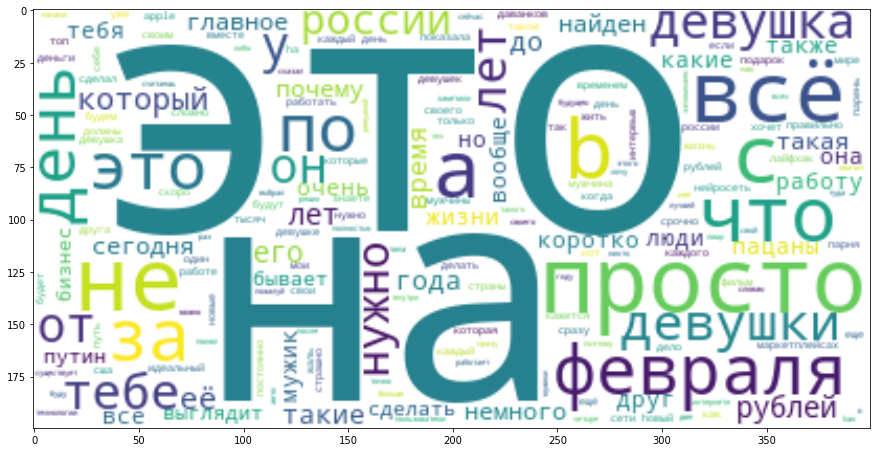

In [17]:

import datetime
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
# январь -февраль
y_f = df[(df['Дата поста'] >= '2024-01-01') & (df['Дата поста'] < '2024-03-01')]
text = " ".join(i for i in y_f['text_clean'])
stopwords = set(stopwords_ru)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
# часто встречаемые девушка, рублей россии

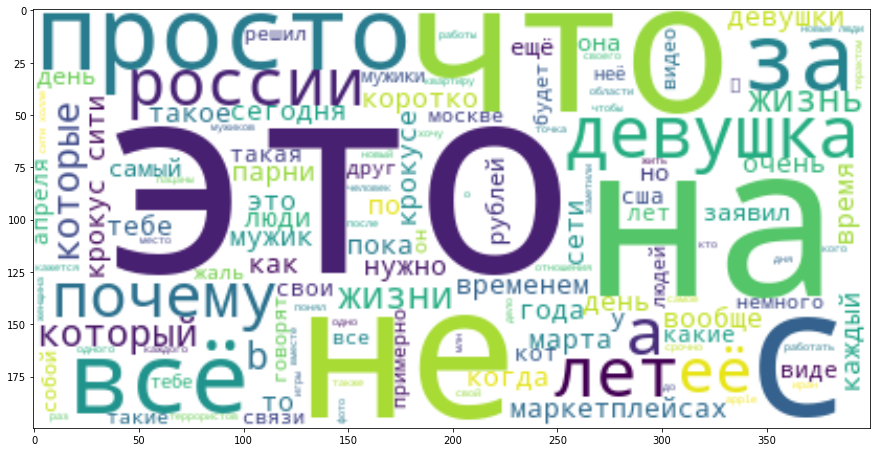

In [18]:
# март-апрель
y_f = df[(df['Дата поста'] >= '2024-03-01') & (df['Дата поста'] < '2024-05-01')]
text = " ".join(i for i in y_f['text_clean'])
stopwords = set(stopwords_ru)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')


In [ ]:
# часто встречаемые девушка, просто, крокус
# теперь сравним с preproc
# январь -февраль

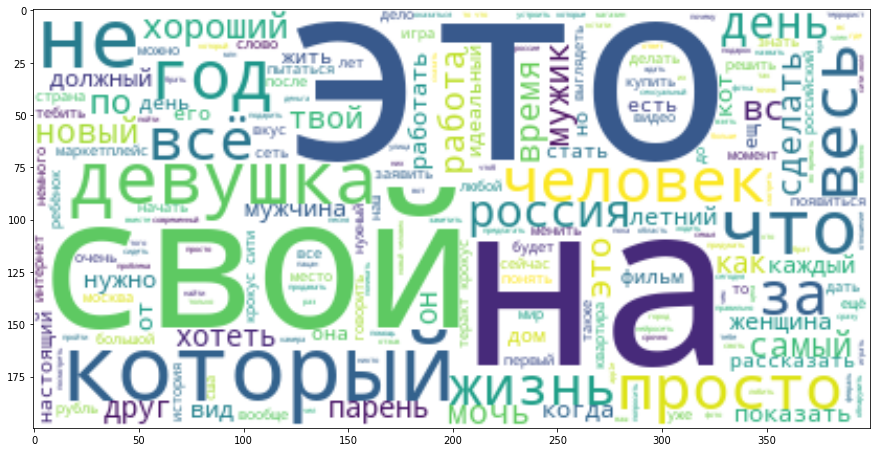

In [32]:
import datetime
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
y_f = df[(df['Дата поста'] >= '2024-01-01') & (df['Дата поста'] < '2024-03-01')]
text = ''
for k in  df['text_preproc']:
    text += ' '.join(k)
stopwords = set(stopwords_ru)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
# часто встречаемые девушка, рублей россии




In [ ]:
# март - апрель

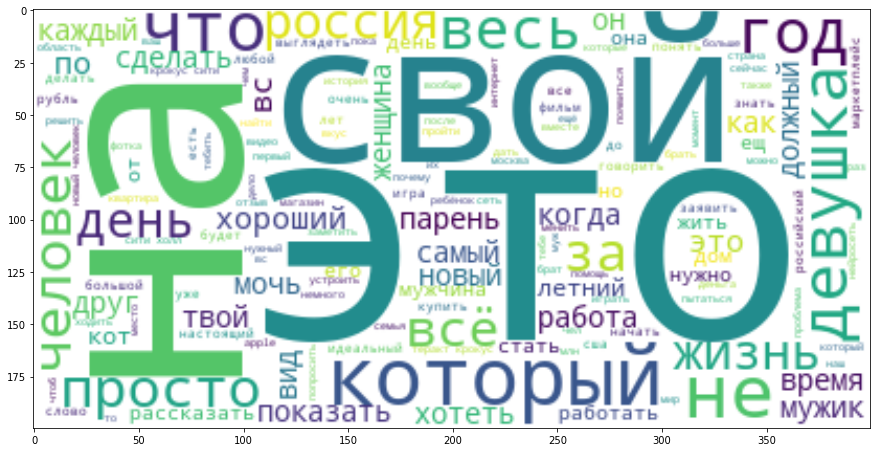

In [33]:
y_f = df[(df['Дата поста'] >= '2024-03-01') & (df['Дата поста'] < '2024-05-01')]
text = ''
for k in  df['text_preproc']:
    text += ' '.join(k)
stopwords = set(stopwords_ru)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
